# How are in-damand skills trendig for Data Analysts?

### Methodology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs

In [4]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load data, Author: Luke Barousse, Site: Hugging Face
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

# Data Cleanup (job_skills to list and dates with correct format)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_mexico = df[(df['job_country'] == 'Mexico') & (df['job_title_short'] == 'Data Analyst')].copy()

In [6]:
# To make it monthly, I'll add a column with the month number
df_mexico['month_number'] = df_mexico['job_posted_date'].dt.month

In [7]:
df_mexico.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_number
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
428,Data Analyst,(cen) cemex go data analyst,"San Pedro Garza García, Nuevo Leon, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-04-26 13:40:27,False,False,Mexico,NaN,NaN,NaN,CEMEX,"[go, excel]","{'analyst_tools': ['excel'], 'programming': ['...",4
801,Data Analyst,Advanced Analytics Manager,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-07 13:15:01,False,False,Mexico,NaN,NaN,NaN,Demo - Coca-Cola,"[python, azure]","{'cloud': ['azure'], 'programming': ['python']}",1


In [8]:
# Explode the job_skills column to have one skill per row
df_mexico_exploded = df_mexico.explode('job_skills')

In [10]:
# Pivot table to count skills by month
skills_trend_pivot = df_mexico_exploded.pivot_table(index='month_number', columns='job_skills', aggfunc='size', fill_value=0)
skills_trend_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,asana,asp.net,assembly,atlassian,aurora,...,vb.net,vba,visio,visual basic,vmware,webex,windows,wire,word,zoom
month_number,,,,,,,,,,,,,,,,,,,,,
1,5,0,9,0,1,0,1,0,1,0,...,0,11,4,6,0,1,3,2,20,0
2,5,0,3,0,0,0,0,1,0,1,...,1,1,1,1,0,0,2,3,13,0
3,0,0,4,0,0,0,0,3,1,0,...,0,4,3,2,1,0,3,1,18,0
4,0,0,4,0,0,0,0,0,2,0,...,0,5,3,0,0,0,2,1,9,0
5,1,0,8,0,0,0,0,1,0,0,...,0,8,0,0,0,0,1,0,10,0
6,3,0,8,0,0,0,0,0,0,2,...,0,8,4,0,0,0,1,0,13,2
7,2,0,4,1,0,0,0,0,0,2,...,0,10,4,1,0,0,2,0,10,1
8,0,0,5,1,1,0,1,2,0,0,...,0,12,6,4,0,0,4,0,16,1
9,2,0,7,0,0,0,0,1,0,0,...,0,10,0,2,0,0,2,0,11,0


In [14]:
# Add a total row to the pivot table
skills_trend_pivot.loc['Total'] = skills_trend_pivot.sum()
# sort by total row
skills_trend_pivot = skills_trend_pivot[skills_trend_pivot.loc['Total'].sort_values(ascending=False).index]
skills_trend_pivot

job_skills,sql,excel,python,tableau,power bi,r,sap,sas,oracle,azure,...,golang,redis,sass,powerbi,pytorch,sqlserver,terraform,typescript,vb.net,webex
month_number,,,,,,,,,,,,,,,,,,,,,
1,149,122,113,78,68,49,37,36,21,14,...,0,0,0,0,1,0,0,0,0,1
2,53,54,37,33,29,13,15,24,12,9,...,0,0,0,0,0,0,0,0,1,0
3,62,61,46,47,38,28,15,22,12,10,...,0,0,0,0,0,0,0,0,0,0
4,58,77,39,29,37,18,21,18,12,5,...,0,1,0,0,0,0,0,0,0,0
5,67,63,55,37,23,29,12,20,7,12,...,0,0,0,0,0,0,0,0,0,0
6,97,93,55,43,54,24,25,32,11,11,...,0,0,0,0,0,1,0,0,0,0
7,118,104,82,59,58,40,26,32,14,16,...,0,0,0,0,0,0,0,0,0,0
8,155,136,95,70,68,44,42,34,20,21,...,0,0,0,0,0,0,1,0,0,0
9,109,85,77,55,51,40,18,18,7,19,...,0,0,1,0,0,0,0,0,0,0


In [15]:
# Drop the 'Total' row for plotting
skills_trend_pivot = skills_trend_pivot.drop('Total')

In [17]:
totals_per_month = df_mexico.groupby('month_number').size()
totals_per_month

month_number
1     355
2     145
3     156
4     159
5     156
6     230
7     254
8     310
9     222
10    264
11    262
12    294
dtype: int64

In [18]:
df_percent = skills_trend_pivot.div(totals_per_month/100, axis=0)
df_percent

job_skills,sql,excel,python,tableau,power bi,r,sap,sas,oracle,azure,...,golang,redis,sass,powerbi,pytorch,sqlserver,terraform,typescript,vb.net,webex
month_number,,,,,,,,,,,,,,,,,,,,,
1,41.971831,34.366197,31.830986,21.971831,19.154930,13.802817,10.422535,10.140845,5.915493,3.943662,...,0.000000,0.000000,0.00000,0.000000,0.28169,0.000000,0.000000,0.000000,0.000000,0.28169
2,36.551724,37.241379,25.517241,22.758621,20.000000,8.965517,10.344828,16.551724,8.275862,6.206897,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.689655,0.00000
3,39.743590,39.102564,29.487179,30.128205,24.358974,17.948718,9.615385,14.102564,7.692308,6.410256,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
4,36.477987,48.427673,24.528302,18.238994,23.270440,11.320755,13.207547,11.320755,7.547170,3.144654,...,0.000000,0.628931,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
5,42.948718,40.384615,35.256410,23.717949,14.743590,18.589744,7.692308,12.820513,4.487179,7.692308,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
6,42.173913,40.434783,23.913043,18.695652,23.478261,10.434783,10.869565,13.913043,4.782609,4.782609,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.434783,0.000000,0.000000,0.000000,0.00000
7,46.456693,40.944882,32.283465,23.228346,22.834646,15.748031,10.236220,12.598425,5.511811,6.299213,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
8,50.000000,43.870968,30.645161,22.580645,21.935484,14.193548,13.548387,10.967742,6.451613,6.774194,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.322581,0.000000,0.000000,0.00000
9,49.099099,38.288288,34.684685,24.774775,22.972973,18.018018,8.108108,8.108108,3.153153,8.558559,...,0.000000,0.000000,0.45045,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000


In [19]:
# Change month numbers to month names
df_percent = df_percent.reset_index()
df_percent['job_posted_month'] = df_percent['month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_percent = df_percent.set_index('job_posted_month').drop(columns='month_number')
df_percent

job_skills,sql,excel,python,tableau,power bi,r,sap,sas,oracle,azure,...,golang,redis,sass,powerbi,pytorch,sqlserver,terraform,typescript,vb.net,webex
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,41.971831,34.366197,31.830986,21.971831,19.154930,13.802817,10.422535,10.140845,5.915493,3.943662,...,0.000000,0.000000,0.00000,0.000000,0.28169,0.000000,0.000000,0.000000,0.000000,0.28169
Feb,36.551724,37.241379,25.517241,22.758621,20.000000,8.965517,10.344828,16.551724,8.275862,6.206897,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.689655,0.00000
Mar,39.743590,39.102564,29.487179,30.128205,24.358974,17.948718,9.615385,14.102564,7.692308,6.410256,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
Apr,36.477987,48.427673,24.528302,18.238994,23.270440,11.320755,13.207547,11.320755,7.547170,3.144654,...,0.000000,0.628931,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
May,42.948718,40.384615,35.256410,23.717949,14.743590,18.589744,7.692308,12.820513,4.487179,7.692308,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
Jun,42.173913,40.434783,23.913043,18.695652,23.478261,10.434783,10.869565,13.913043,4.782609,4.782609,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.434783,0.000000,0.000000,0.000000,0.00000
Jul,46.456693,40.944882,32.283465,23.228346,22.834646,15.748031,10.236220,12.598425,5.511811,6.299213,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
Aug,50.000000,43.870968,30.645161,22.580645,21.935484,14.193548,13.548387,10.967742,6.451613,6.774194,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.322581,0.000000,0.000000,0.00000
Sep,49.099099,38.288288,34.684685,24.774775,22.972973,18.018018,8.108108,8.108108,3.153153,8.558559,...,0.000000,0.000000,0.45045,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000


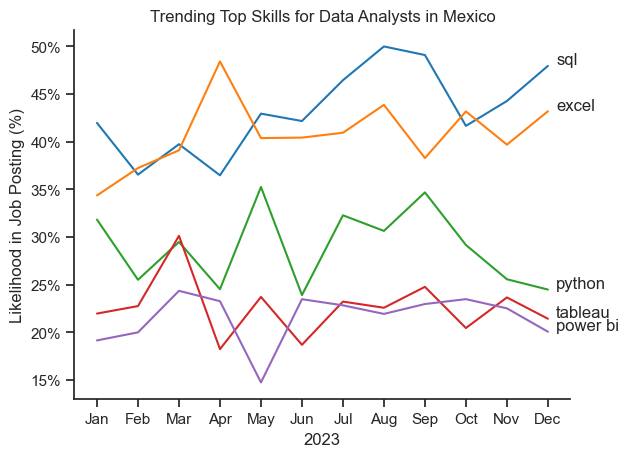

In [40]:
sns.set_theme(style='ticks')
#Just plot the first 5 skills for clarity
sns.lineplot(data=df_percent.iloc[:, :5], dashes=False, palette='tab10')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Mexico')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Posting (%)')
plt.legend().remove()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
for i in range(5):
    plt.text(11.2, df_percent.iloc[-1, i] + 0.15, df_percent.columns[i])